In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

In [13]:
train = pd.read_csv("train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### Строим матрицу корреляции признаков, видим, что признак registered сильно коррелирует с целевой переменной

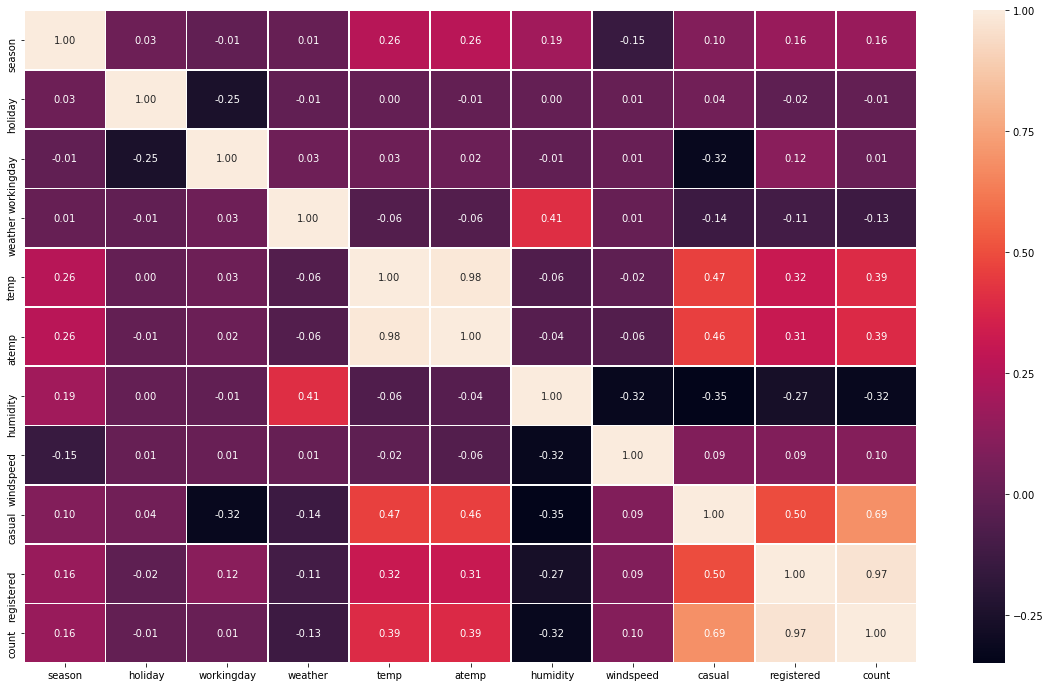

In [14]:
features=[]
for i in train :
    features.append(i)
cor_features = train[features]
f,ax = plt.subplots(figsize=(20, 12))
sns.heatmap(cor_features.corr(), annot=True, linewidths=.7, fmt= '.2f',ax=ax)
plt.show()

In [15]:
features.remove("registered")
features.remove("datetime")
features.remove("count")
print(features)

['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual']


In [16]:
X = train.drop(['datetime', 'registered', 'count'], axis = 1)
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=5)

In [17]:
ex=[]
mse=[]
for maxd in range(2,20):
    model = tree.DecisionTreeRegressor(max_depth=maxd)
    model.fit(X_train,y_train)
    y_pred = np.array(model.predict(X_test), dtype = int)
    ex.append(explained_variance_score(y_test , y_pred))
    mse.append(mean_squared_error(y_test, y_pred))

#### При максимальной глубине дерева= 7 получим лучший MSE

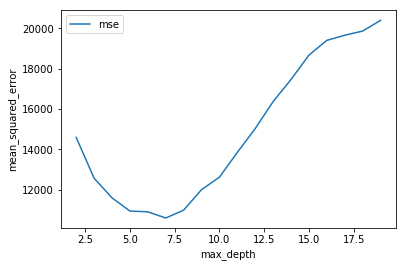

In [18]:
plt.plot(range(2,20),mse,label='mse')
plt.xlabel('max_depth')
plt.ylabel('mean_squared_error')
plt.legend()

In [19]:
model = tree.DecisionTreeRegressor(max_depth=7, min_samples_split=3)
model.fit(X_train,y_train)
y_pred = np.array(model.predict(X_test), dtype = int)

#### Считаем MSE и score

In [20]:
mean_squared_error(y_test, y_pred)

10590.329201101928

In [21]:
print(explained_variance_score(y_test , y_pred))

0.6815193923384788


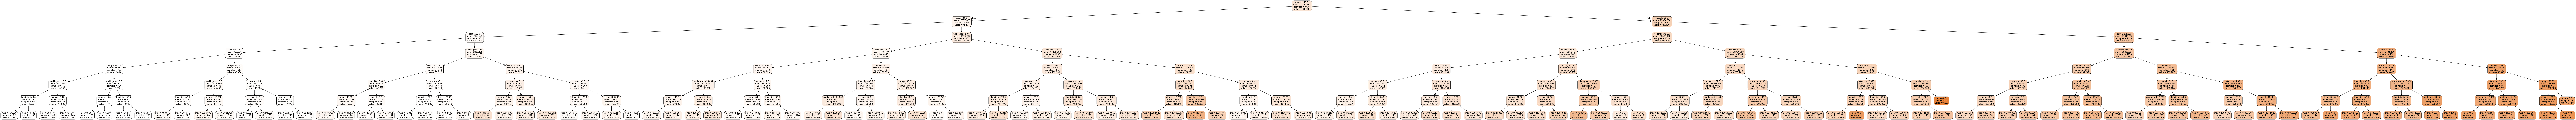

In [22]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())